# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [86]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [88]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [89]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [90]:
# Extract all table data
table = soup.find('tbody')
print(type(table))


<class 'bs4.element.Tag'>


In [91]:
# Extract rows data
rows = table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [92]:
# Create lists for columns (headers)
ids, terrestrial_dates, sols, ls_values, months, min_temps, pressures = [], [], [], [], [], [], []

# Loop through the data to create lists for each header
for row in rows:
    cells = row.find_all('td') # Extract all <td> elements
    
    # Append data from each cell to the corresponding list
    ids.append(cells[0].text.strip())
    terrestrial_dates.append(cells[1].text.strip())
    sols.append(cells[2].text.strip())
    ls_values.append(cells[3].text.strip())
    months.append(cells[4].text.strip())
    min_temps.append(cells[5].text.strip())
    pressures.append(cells[6].text.strip())

In [93]:
# Create a Pandas DataFrame by using the lists for each header
mars_data = {
    'id': ids,
    'terrestrial_date': terrestrial_dates,
    'sol': sols,
    'ls': ls_values,
    'month': months,
    'min_temp': min_temps,
    'pressure': pressures
}
mars_data_df = pd.DataFrame(mars_data)

In [94]:
# Confirm DataFrame was created successfully
mars_data_df 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [95]:
# Examine data type of each column
print(mars_data_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [96]:
# Change data types for data analysis
mars_data_df['id'] = mars_data_df['id'].astype(int)
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])
mars_data_df['sol'] = mars_data_df['sol'].astype(int)
mars_data_df['ls'] = mars_data_df['ls'].astype(int)
mars_data_df['month'] = mars_data_df['month'].astype(int)
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype(float)
mars_data_df['pressure'] = mars_data_df['pressure'].astype(float)

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [97]:
# 1. How many months are there on Mars?
print(f"{len(mars_data_df['month'].unique())}")

12


In [98]:
# 2. How many sols (Martian days) worth of data are there?
print(f"{len(mars_data_df['sol'])}")

1867


In [99]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_data_df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

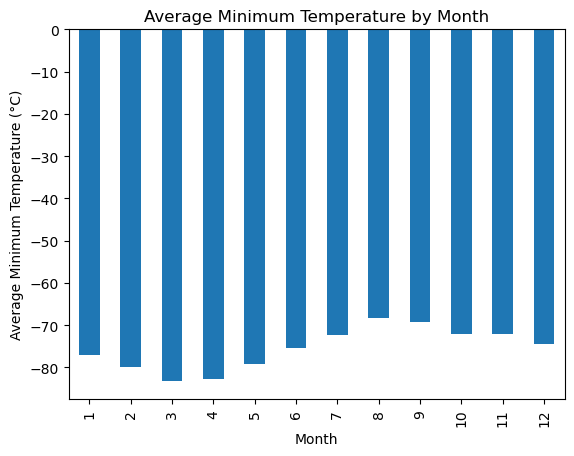

In [100]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar',)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

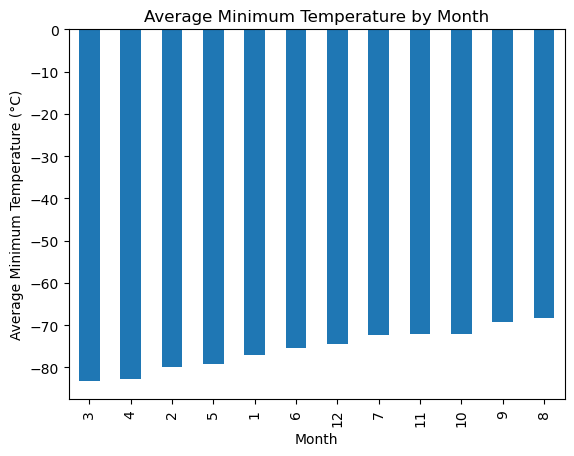

In [101]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()
sorted_avg_min_temp.plot(kind='bar',)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

In [102]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

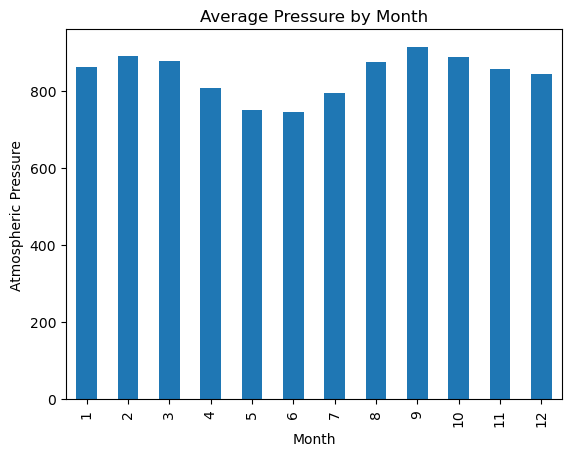

In [103]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar',)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

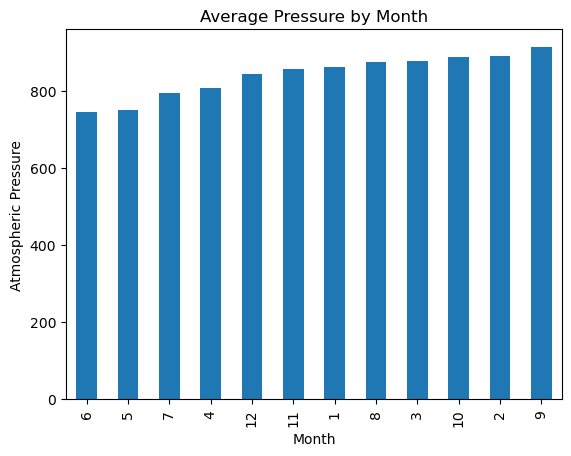

In [104]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()
sorted_avg_pressure_by_month.plot(kind='bar',)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

The number of terrestrial days for martian year is: 687 days.


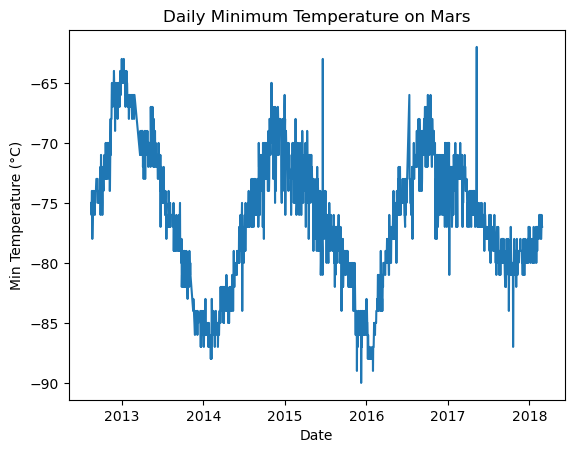

In [105]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Initialize variables
match_counter = 0
year1 = None
year2 = None
previous_month = None

# Iterate through the DataFrame row by row
for _, row in mars_data_df.iterrows():  # Use iterrows to access each row
    month = row['month']  # Extract month number
    terrestrial_date = row['terrestrial_date']  # Extract terrestrial_date
    
    if month == 1 and previous_month == 12:  # Check if current month is 1 and previous was 12
        match_counter += 1
        if match_counter == 1:
            year1 = terrestrial_date
        elif match_counter == 2:
            year2 = terrestrial_date 
            break
    # Update the previous month
    previous_month = month

# Calculate the difference in days between the two instances
year_days = (year2 - year1).days
   
print(f"The number of terrestrial days for martian year is: {year_days} days.")

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_data_df['terrestrial_date'], mars_data_df['min_temp'])
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Date')
plt.ylabel('Min Temperature (°C)')
plt.show()

#### Minimum Temperature

Martian minimun teperature flactuates between -68C in the summer and -83C in the winter

#### Atmospheric Pressure

Martian atmospheric pressure flactuates between 745.054422 in the summer and 913.305970 in the fall

#### Year Length

The number of terrestrial days for martian year is: 687 days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [106]:
# Write the data to a CSV
file_name = 'mars_data.csv'
mars_data_df.to_csv(file_name, index=False) 

In [ ]:
browser.quit()